In [1]:
import os
import scipy
import scipy.io as scio
from scipy import stats
from scipy import ndimage
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
cwd = os.getcwd()

In [3]:
path_to_data = os.path.join(cwd, r"ShanghaiTech/part_A") # replace by the path where you put your data

In [4]:
path_to_data

'C:\\Users\\AB\\Desktop\\3A\\MAP\\MAP583 - Deep Learning\\ShanghaiTech/part_A'

In [5]:
def gaussian_filter_density(gt):
    #print(gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    #print("pts=",pts)
    leafsize = 2048
    # build kdtree
    #print 'build kdtree...'
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    #print 'query kdtree...' 
    distances, locations = tree.query(pts, k=4, eps=10.)

    #print 'generate density...'
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma =((distances[i][1]+distances[i][2]+distances[i][3])/3)*0.3
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point

        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    #print 'done.'
    return density

In [10]:
nb_train = len(os.listdir(os.path.join(path_to_data,r"train_data/images")))
num = np.random.randint(1,nb_train+1)
print("IMG_%s"%str(num))
img = plt.imread(os.path.join(path_to_data,r"train_data/images/IMG_%s.jpg"%str(num)))
mat = scio.loadmat(os.path.join(path_to_data,r"train_data/ground-truth/GT_IMG_%s.mat"%str(num)))
k = np.zeros((img.shape[0],img.shape[1]))
gt = mat["image_info"][0][0][0][0][0]
for i in range(0,len(gt)):
    if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
        k[int(gt[i][1]),int(gt[i][0])] = 1
print("number of persons:", int(np.sum(k)))
dens = gaussian_filter_density(k)

IMG_167
number of persons: 271


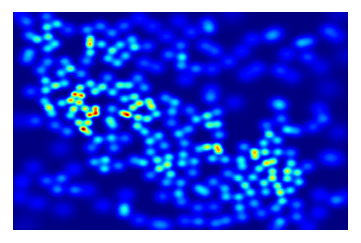

In [7]:
ax = sns.heatmap(dens, cmap="jet", xticklabels=False, yticklabels=False, cbar=False)